In [12]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

In [2]:
bankdata=pd.read_csv('bill_authentication.csv')

In [3]:
bankdata.shape

(1372, 5)

In [4]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
X=bankdata.drop('Class',axis=1)
y=bankdata['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [7]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
y_pred = svclassifier.predict(X_test)

$\begin{pmatrix}tn & fp \\fn & tp \end{pmatrix}$

The precision is the ratio $ \frac{tp}{tp+fp} $ where tp is the number of true positives and fp the number of false positives.

The best value is 1 and the worst value is 0.

The recalll is ability of the classifier to find all the positive samples. the ratio is that $ \frac{tp}{tp+fn} $

The f1score is a weighted harmonic mean of precision and recall.

The last line gives a weighted average of precision, recall and f1-score where the weights are the support values.


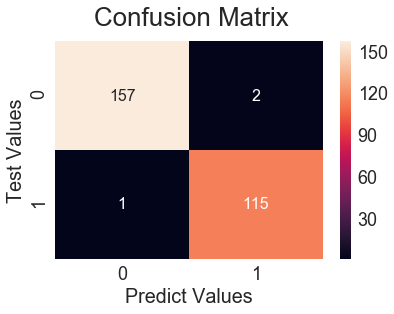

             precision    recall  f1-score   support

    Class 0       0.99      0.99      0.99       159
    Class 1       0.98      0.99      0.99       116

avg / total       0.99      0.99      0.99       275



In [13]:
cm=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm,  range(0,2),range(0,2))
sn.set(font_scale=1.8)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="d")# font size,  fmt sayıları integer olarak yazdı.
plt.suptitle('Confusion Matrix', x=0.44, y=1.0, ha='center', fontsize='large')
plt.xlabel('Predict Values')
plt.ylabel('Test Values')
plt.show()
targetnames=["Class 0", "Class 1"]
print(classification_report(y_test,y_pred,target_names=targetnames))  